In [3]:
import pandas as pd
import numpy as np
import plotly.express as px #criação de gráficos dinâmicos
import plotly.graph_objects  as go #criação e concatenização de graficos
from sklearn.preprocessing import StandardScaler #padronização dos dados
from sklearn.cluster import KMeans

In [5]:
#abrindo o arquivo de dados
base_iris = pd.read_csv('Documents/Cursos/IGTI/Arquiteto de Big Data/Módulo 1 - Fundamentos de Big Data/base_iris.csv', sep = ';')

base_iris.head()

base_iris.shape

#verifica as classes das flores
base_iris['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
#criando variável x com as colunas petal length petal width
x_petala = base_iris.iloc[:,[2,3]].values
x_petala[:10]

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1]])

In [7]:
#normalização dos dados
normalizar_dados = StandardScaler()
x_petala = normalizar_dados.fit_transform(x_petala)
x_petala[:10]

array([[-1.3412724 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.39813811, -1.31297673],
       [-1.2844067 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.17067529, -1.05003079],
       [-1.3412724 , -1.18150376],
       [-1.2844067 , -1.31297673],
       [-1.3412724 , -1.31297673],
       [-1.2844067 , -1.4444497 ]])

In [9]:
# teste de cotovelo para verificar quantidade de clusters
wcss_petala = [] #cria lista vazia para armazelar valores do teste de kmeans
for i in range(1,11):
    kmeans_petala = KMeans(n_clusters=i, random_state=0) #executa o kmeans para os valores de i
    kmeans_petala.fit(x_petala) # normaliza o treinamento
    wcss_petala.append(kmeans_petala.inertia_) #popula a lista com valor do wcss treinado
    
#visualizar os valores do wcss - método cotovelo para quantificar o número de clusters
for i in range(len(wcss_petala)):
    print('Cluster: ', i, '- Valor do wcss: ', wcss_petala[i])


Cluster:  0 - Valor do wcss:  300.0
Cluster:  1 - Valor do wcss:  54.14584701344989
Cluster:  2 - Valor do wcss:  18.04698389190627
Cluster:  3 - Valor do wcss:  12.307440251261845
Cluster:  4 - Valor do wcss:  9.181131495513897
Cluster:  5 - Valor do wcss:  7.215096212730808
Cluster:  6 - Valor do wcss:  6.026593155951447
Cluster:  7 - Valor do wcss:  5.173315218915379
Cluster:  8 - Valor do wcss:  4.423975871969688
Cluster:  9 - Valor do wcss:  3.9139417830543195


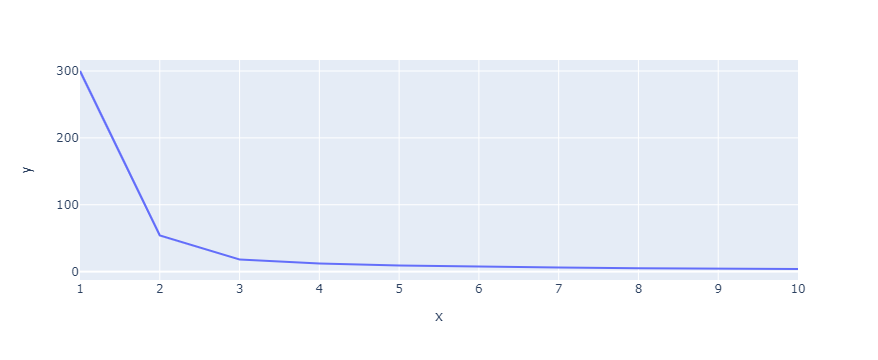

In [10]:
#verificar no gráficos
grafico_cotovelo_petala = px.line( x = range(1,11), y=wcss_petala)
grafico_cotovelo_petala.show()

In [11]:
#classifica conforme número de clusters identificado
kmeans_petala = KMeans(n_clusters=3, random_state=0)
label_cluster_petala = kmeans_petala.fit_predict(x_petala)
#visualiza classificação
label_cluster_petala

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
#pegar o centróides dos grupos
centroides_petala = kmeans_petala.cluster_centers_
centroides_petala

array([[-1.30487835, -1.25512862],
       [ 1.02813193,  1.12749028],
       [ 0.30564587,  0.16609419]])

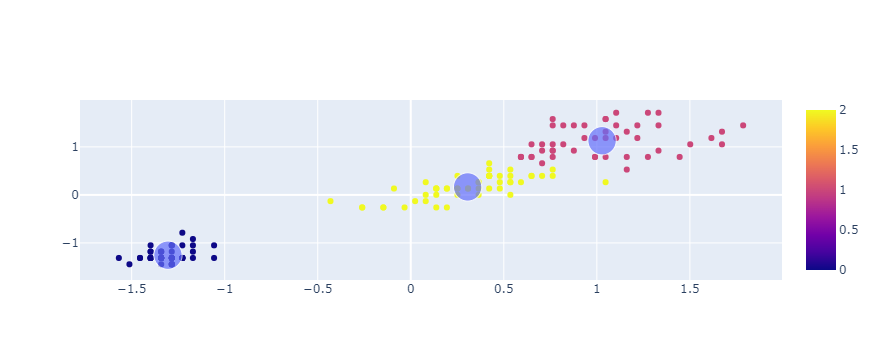

In [14]:
#visualizando em gráfico
#gráfico de agrupamento
grafico_petala = px.scatter(x = x_petala[:,0], y = x_petala[:,1], color=label_cluster_petala)
#gráfico de centroides
grafico_centroide_petala = px.scatter(x = centroides_petala[:,0], y = centroides_petala[:,1], size=[5,5,5])
#juntando os gráficos
grafico_final_petala = go.Figure(data = grafico_petala.data + grafico_centroide_petala.data)
grafico_final_petala.show()

In [15]:
#### SEPALA ####

#criando variável x com as colunas sepala length petal width
x_sepala = base_iris.iloc[:,[0,1]].values
x_sepala[:10]

#normalização dos dados
normalizar_dados = StandardScaler()
x_sepala = normalizar_dados.fit_transform(x_sepala)
x_sepala[:10]

array([[-0.90068117,  1.03205722],
       [-1.14301691, -0.1249576 ],
       [-1.38535265,  0.33784833],
       [-1.50652052,  0.10644536],
       [-1.02184904,  1.26346019],
       [-0.53717756,  1.95766909],
       [-1.50652052,  0.80065426],
       [-1.02184904,  0.80065426],
       [-1.74885626, -0.35636057],
       [-1.14301691,  0.10644536]])

In [18]:
# teste de cotovelo para verificar quantidade de clusters
wcss_sepala = [] #cria lista vazia para armazelar valores do teste de kmeans
for i in range(1,11):
    kmeans_sepala = KMeans(n_clusters=i, random_state=0) #executa o kmeans para os valores de i
    kmeans_sepala.fit(x_sepala) # normaliza o treinamento
    wcss_sepala.append(kmeans_sepala.inertia_) #popula a lista com valor do wcss treinado
    
#visualizar os valores do wcss - método cotovelo para quantificar o número de clusters
for i in range(len(wcss_sepala)):
    print('Cluster: ', i, '- Valor do wcss: ', wcss_sepala[i])

Cluster:  0 - Valor do wcss:  299.99999999999994
Cluster:  1 - Valor do wcss:  168.3926219836109
Cluster:  2 - Valor do wcss:  103.78982520596082
Cluster:  3 - Valor do wcss:  79.7831915642203
Cluster:  4 - Valor do wcss:  61.70659834761936
Cluster:  5 - Valor do wcss:  52.13668525175613
Cluster:  6 - Valor do wcss:  44.82457356697236
Cluster:  7 - Valor do wcss:  36.228586288894256
Cluster:  8 - Valor do wcss:  30.56569905329544
Cluster:  9 - Valor do wcss:  26.796317715913403


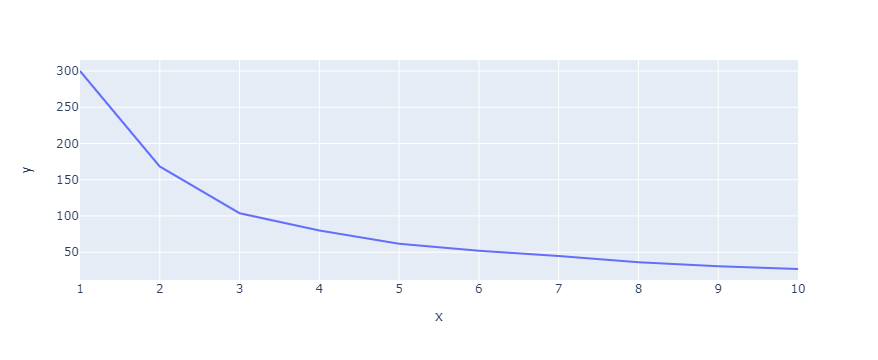

In [19]:
#verificar no gráficos
grafico_cotovelo_sepala = px.line( x = range(1,11), y=wcss_sepala)
grafico_cotovelo_sepala.show()

In [20]:
#classifica conforme número de clusters identificado
kmeans_sepala = KMeans(n_clusters=3, random_state=0)
label_cluster_sepala = kmeans_sepala.fit_predict(x_sepala)

#visualiza classificação
label_cluster_sepala

#pegar o centróides dos grupos
centroides_sepala = kmeans_sepala.cluster_centers_
centroides_sepala

array([[-0.04825457, -0.89224112],
       [-0.97822861,  0.89321545],
       [ 1.20144049,  0.14411561]])

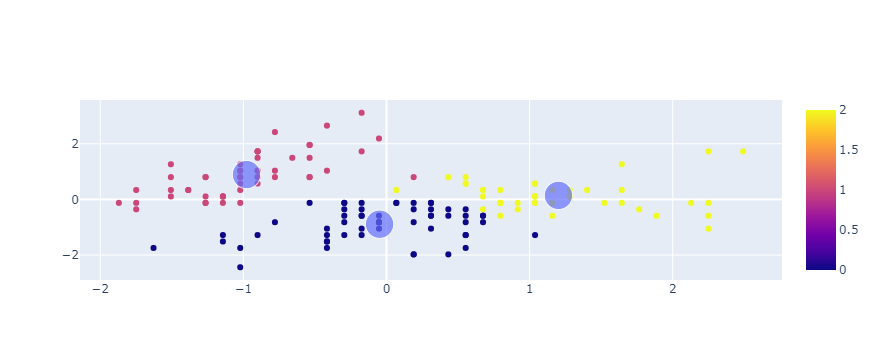

In [22]:
#visualizando em gráfico
#gráfico de agrupamento
grafico_sepala = px.scatter(x = x_sepala[:,0], y = x_sepala[:,1], color=label_cluster_sepala)
#gráfico de centroides
grafico_centroide_sepala = px.scatter(x = centroides_sepala[:,0], y = centroides_sepala[:,1], size=[5,5,5])
#juntando os gráficos
grafico_final_sepala = go.Figure(data = grafico_sepala.data + grafico_centroide_sepala.data)
grafico_final_sepala.show()